# Key components to be fulfilled:

# 1.Loading and Preprocessing:
*Load the breast cancer dataset from sklearn.
*Preprocess the data to handle any missing values and perform necessary feature scaling.
*Explain the preprocessing steps you performed and justify why they are necessary for this dataset.


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report 

In [8]:
data = load_breast_cancer()

In [9]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['mean area'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,0,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,0,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
print("Shape of the dataset:")
print(df.shape)

Shape of the dataset:
(569, 30)


In [15]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    int32  
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness e

In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each colum:\n", missing_values)

Missing values in each colum:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


There is no missing values in the dataset,so need not imputation for this dataset.

In [19]:
df.duplicated().sum()

0

There is no duplicate values in the dataset.

In [21]:
# Differentiating Columns
#To understand the categorical column and numerical columns 
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print Results
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: []
Numerical Columns: ['mean radius', 'mean texture', 'mean perimeter', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In the dataset,there is no categorical column.so need not implementing Encoding categorical data.

In [23]:
# Correlation with target variable
#To understand the correlation of columns with respect to Target column 
print(df.corr()['mean area'].sort_values(ascending=False))

mean area                  1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0.776454
mean concave points       -0

In [25]:
#To find the best features from the dataset using Kbest feture selection
from sklearn.feature_selection import SelectKBest, f_classif
# SelectKBest for feature selection
X = df.drop(columns=['mean area'])  # Features
y = df['mean area']  # Target

select_k = SelectKBest(score_func=f_classif, k=4)  # Selecting Top 1 feature, depends on the person
X_selected = select_k.fit_transform(X, y)

# Get the names and scores of the selected features
selected_features = X.columns[select_k.get_support()]
selected_scores = select_k.scores_[select_k.get_support()] # to find scores of all features

print("Selected Features:", selected_features)
print("Feature Scores based on select_k:", selected_scores)


# Create a DataFrame to display feature names and scores
feature_scores_df = pd.DataFrame({'Feature': selected_features, 'Score': selected_scores})


# Sort by scores in ascending order
feature_scores_df = feature_scores_df.sort_values(by="Score", ascending=False)

# Print results
print("Selected Features:\n", feature_scores_df)

Selected Features: Index(['mean concave points', 'worst radius', 'worst perimeter',
       'worst concave points'],
      dtype='object')
Feature Scores based on select_k: [861.67602001 860.78170699 897.94421886 964.38539345]
Selected Features:
                 Feature       Score
3  worst concave points  964.385393
2       worst perimeter  897.944219
0   mean concave points  861.676020
1          worst radius  860.781707


# Splitting the dataset into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Data (Features):")
print(X_train)
print("\nTesting Data (Features):")
print(X_test)


Training Data (Features):
     mean radius  mean texture  mean perimeter  mean smoothness  \
68         9.029         17.33           58.79          0.10660   
181       21.090         26.57          142.70          0.11410   
63         9.173         13.86           59.20          0.07721   
248       10.650         25.22           68.01          0.09657   
60        10.170         14.88           64.55          0.11340   
..           ...           ...             ...              ...   
71         8.888         14.64           58.79          0.09783   
106       11.640         18.33           75.17          0.11420   
270       14.290         16.82           90.30          0.06429   
435       13.980         19.62           91.12          0.10600   
102       12.180         20.52           77.22          0.08013   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
68            0.14130         0.31300              0.04375         0.2111   
181           

# Feature scaling

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
X_train_scaled 

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [46]:
X_train_scaled.shape

(455, 29)

2. Classification Algorithm Implementation :
Implement the following five classification algorithms:
*Logistic Regression
*Decision Tree Classifier
*Random Forest Classifier
*Support Vector Machine (SVM)
*k-Nearest Neighbors (k-NN)
For each algorithm, provide a brief description of how it works and why it might be suitable for this dataset


# Five different classification algorithms have been applied:

-- Logistic Regression: A linear approach designed for binary classification.
-- Decision Tree Classifier: A non-linear model that partitions data based on feature attributes.
-- Random Forest Classifier: An ensemble technique that constructs multiple decision trees for improved accuracy.
-- Support Vector Machine (SVM): A robust algorithm particularly effective for binary classification tasks.
-- k-Nearest Neighbors (k-NN): A non-parametric method that classifies data based on proximity to its nearest neighbors.

In [116]:
# Define a function to train and evaluate models
def train_and_evaluate(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
 acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print results
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    return acc, prec, rec, f1

In [118]:
# Dictionary to store accuracy results
results = {'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}


In [122]:
# Evaluate each model
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),  # Enable probability for ROC-AUC
    'k-NN': KNeighborsClassifier()
}

for name, model in models.items():
    acc, prec, rec, f1 = train_and_evaluate(model, name, X_train, y_train, X_test, y_test)
    results['Model'].append(name)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1-Score'].append(f1)


Logistic Regression Performance:
Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1 Score: 0.9790
Confusion Matrix:
[[41  2]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Decision Tree Performance:
Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
F1 Score: 0.9577
Confusion Matrix:
[[40  3]
 [ 3 68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Random Forest Performance:
Ac

# 3. Model Comparison:
*Compare the performance of the five classification algorithms.
*Which algorithm performed the best and which one performed the worst?

In [124]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)



Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.973684   0.972222  0.985915  0.979021
1        Decision Tree  0.947368   0.957746  0.957746  0.957746
2        Random Forest  0.964912   0.958904  0.985915  0.972222
3                  SVM  0.982456   0.972603  1.000000  0.986111
4                 k-NN  0.947368   0.957746  0.957746  0.957746


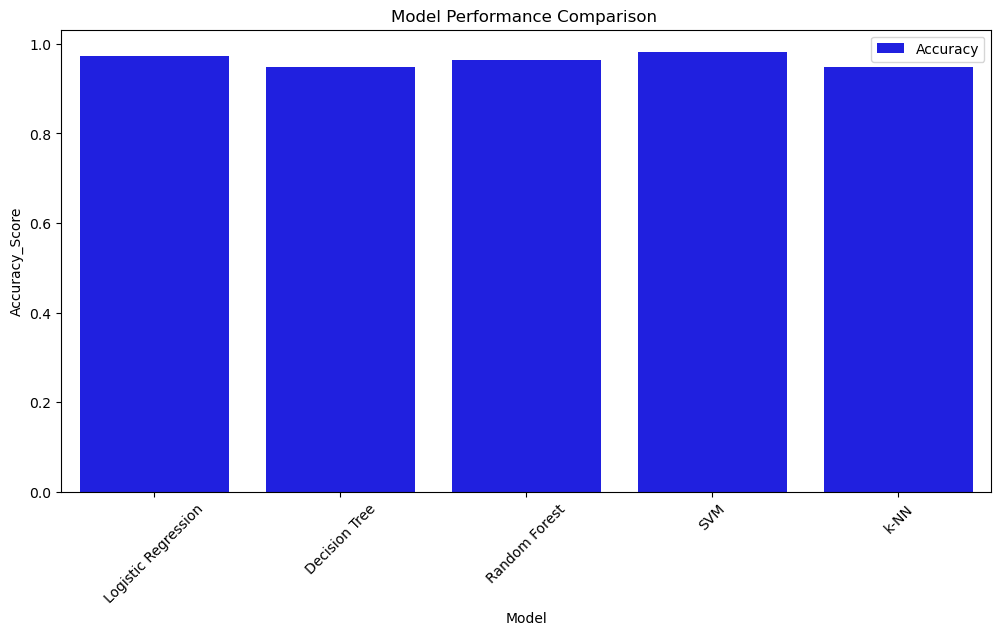

In [130]:
# Plotting Results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy',color="b", data=results_df, label='Accuracy')
plt.xticks(rotation=45)
plt.title("Model Performance Comparison ")
plt.ylabel("Accuracy_Score")
plt.legend()
plt.show()

-- Comparing the performance of the five classification algorithms ,the SVM is the best model having accuracy of 0.98 as compared to other models.
-- The decisiontree and KNN are the  worst models having the accuracy of 0.94

-- The End --